# WeatherPy

Used starter code as a template to complete assignment.



In [1]:
# Import the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import citipy
import requests
import time
from scipy.stats import linregress


# api key
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

### Use citipy to generate city lists

In [2]:
# Dataframe for longitude and latitude
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 564


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | tsiombe
Processing Record 5 of Set 1 | mugia
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | la'ie
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | maues
Processing Record 12 of Set 1 | sinabang
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | chernyshevskiy
Processing Record 17 of Set 1 | nabire
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | port saint john's
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,74.08,50,0,7.67,RO,1720471446
1,tiksi,71.6872,128.8694,50.95,59,0,4.27,RU,1720471502
2,port-aux-francais,-49.3500,70.2167,36.21,86,10,32.55,TF,1720471503
3,tsiombe,-25.3000,45.4833,61.77,74,0,4.88,MG,1720471504
4,mugia,43.1041,-9.2179,64.90,96,100,19.35,ES,1720471506


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,74.08,50,0,7.67,RO,1720471446
1,tiksi,71.6872,128.8694,50.95,59,0,4.27,RU,1720471502
2,port-aux-francais,-49.3500,70.2167,36.21,86,10,32.55,TF,1720471503
3,tsiombe,-25.3000,45.4833,61.77,74,0,4.88,MG,1720471504
4,mugia,43.1041,-9.2179,64.90,96,100,19.35,ES,1720471506


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

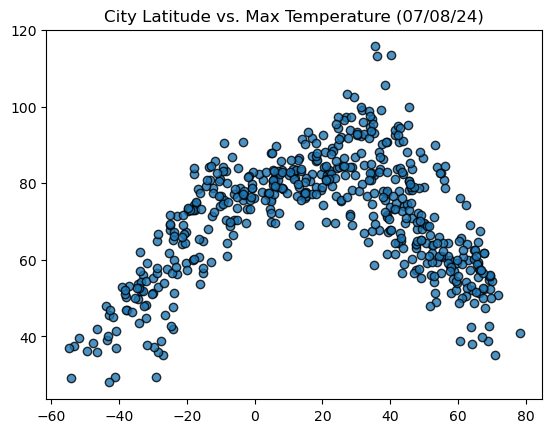

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

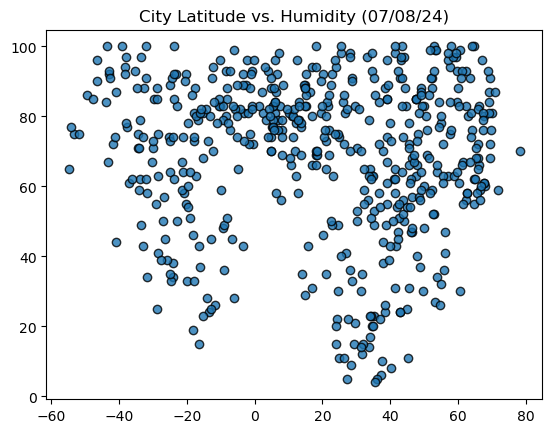

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

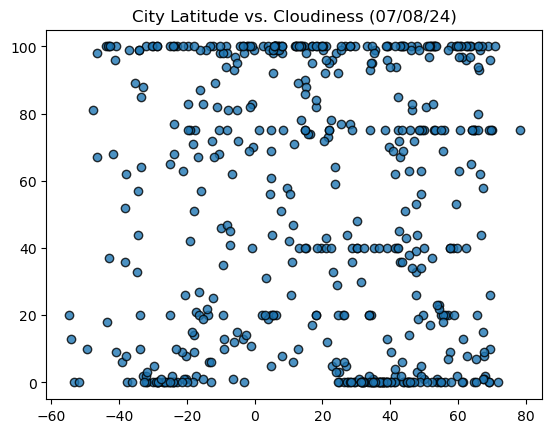

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

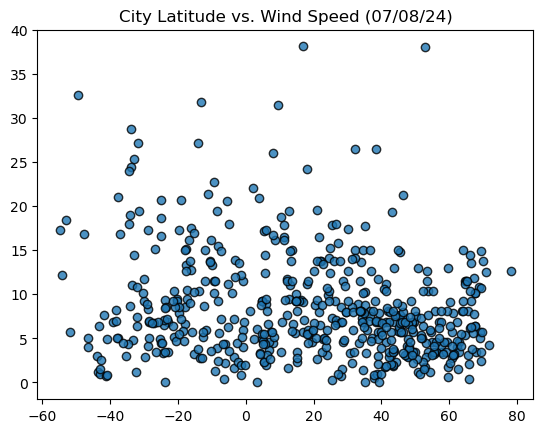

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
	
	# Run regression on hemisphere weather data
	(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
	
	# Calculate the regression line "y values" from the slope and intercept
	regress_values = x_values * slope + intercept
	
	# Get the equation of the line
	line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
	
	# Create a scatter plot and plot the regression line
	plt.scatter(x_values,y_values)
	plt.plot(x_values,regress_values,"r")
	
	# Annotate the text for the line equation
	plt.annotate(line_eq,(0,0),fontsize=15, color="red")
	plt.xlabel('Latitude')
	plt.ylabel(title)

	# Print r value
	print(f"The r-value is: {rvalue}")
	
	#Print equation of the line
	print(f"The equation of the regression line is: {line_eq}")



In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,74.08,50,0,7.67,RO,1720471446
1,tiksi,71.6872,128.8694,50.95,59,0,4.27,RU,1720471502
4,mugia,43.1041,-9.2179,64.90,96,100,19.35,ES,1720471506
5,salalah,17.0151,54.0924,82.49,94,100,5.75,OM,1720471507
6,la'ie,21.6477,-157.9253,80.46,83,73,8.01,US,1720471508


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,36.21,86,10,32.55,TF,1720471503
3,tsiombe,-25.3000,45.4833,61.77,74,0,4.88,MG,1720471504
7,east london,-33.0153,27.9116,56.08,43,2,25.32,ZA,1720471509
9,maues,-3.3836,-57.7186,90.88,43,13,1.63,BR,1720471512
11,adamstown,-25.0660,-130.1015,67.77,64,100,18.61,PN,1720471514


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6307983304126633
The equation of the regression line is: y = -0.47x + 92.0


Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs. Latitude')

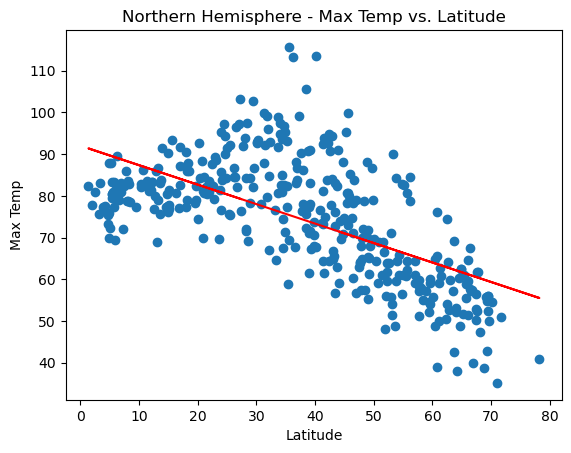

In [83]:
# Linear regression on Northern Hemisphere

#Show plot
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp',(6,30))

#Set titles
plt.title('Northern Hemisphere - Max Temp vs. Latitude')


The r-value is: 0.8426741386410899
The equation of the regression line is: y = 0.95x + 83.48


Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude')

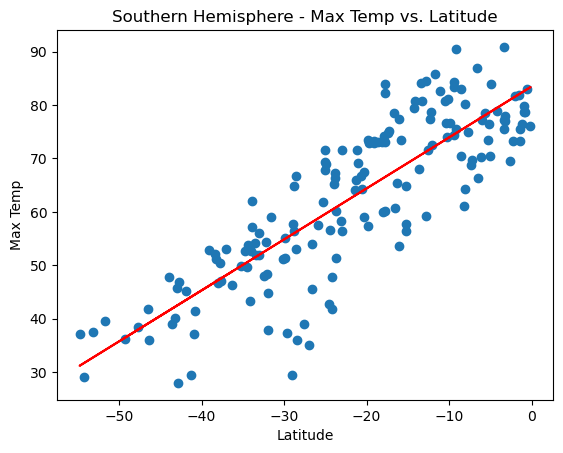

In [84]:
# Linear regression on Southern Hemisphere

#Show plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp',(-55,90))

#Set titles
plt.title('Southern Hemisphere - Max Temp vs. Latitude')



**Discussion about the linear relationship:** Based on the data it would appear temperature rises as you approach 0 latitude. 
In the northern hemisphere it cooled the further away from 0 it got. While in the southern hemisphere the closer to 0 the hotter it got. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03338046566399201
The equation of the regression line is: y = -0.04x + 69.06


Text(0.5, 1.0, 'Northern Hemisphere - Humidity vs. Latitude')

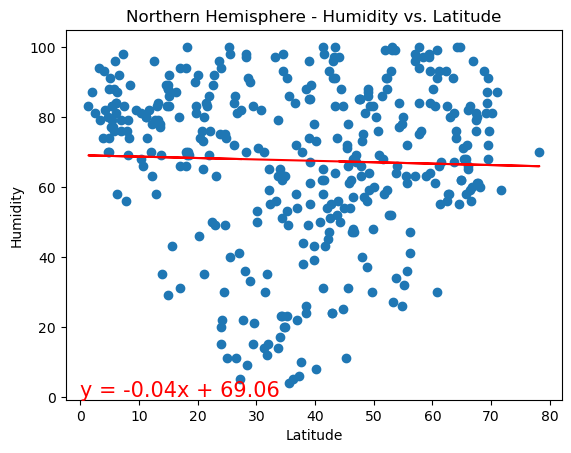

In [85]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Humidity',(40,10))

#Set titles
plt.title('Northern Hemisphere - Humidity vs. Latitude')

The r-value is: -0.04321308091101011
The equation of the regression line is: y = -0.07x + 69.13


Text(0.5, 1.0, 'Southern Hemisphere - Humidity vs. Latitude')

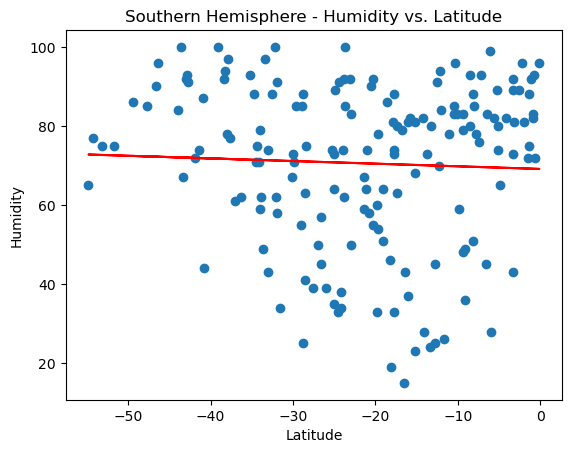

In [86]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Humidity',(-55,20))

#Set titles
plt.title('Southern Hemisphere - Humidity vs. Latitude')

**Discussion about the linear relationship:** The data shows an even spread of humidity across both hemispheres. However, there does seem to be a median humidity level of around 69. This could be due to the large amount of water on the earth. Suggesting that latitude may not impact humidity as much. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.1297556857028592
The equation of the regression line is: y = -0.27x + 61.57


Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness vs. Latitude')

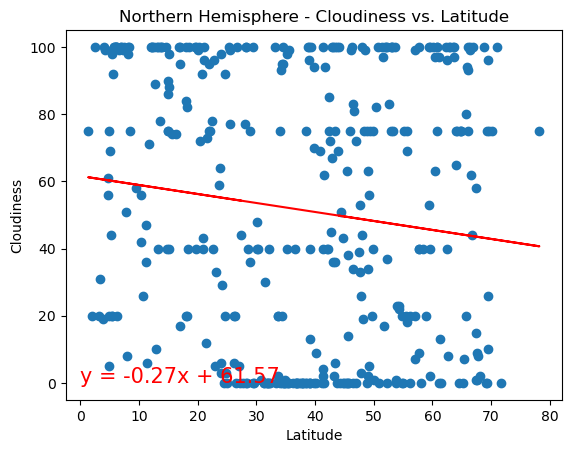

In [87]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness',(40,10))

#Set titles
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

The r-value is: 0.18674552519395282
The equation of the regression line is: y = 0.56x + 60.67


Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness vs. Latitude')

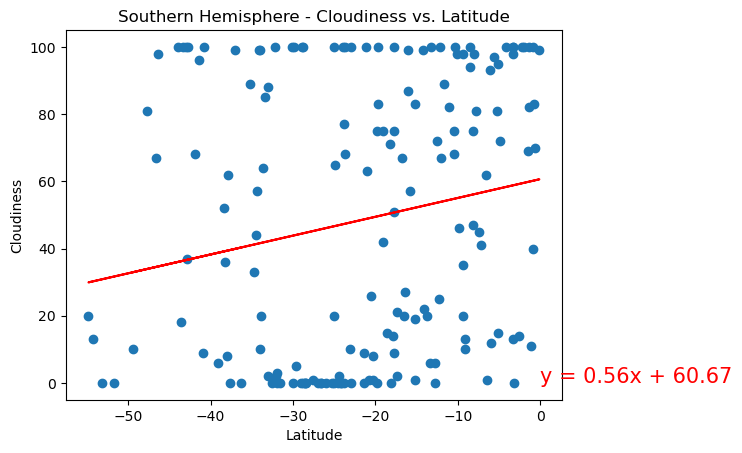

In [88]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Cloudiness',(-55,20))

#Set titles
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')

**Discussion about the linear relationship:** According to the data more clouds are present at the equator. The first plot shows less clouds as we move to the north pole. While the second plot shows more clouds as we approach the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.20085618229463442
The equation of the regression line is: y = -0.06x + 9.87


Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed vs. Latitude')

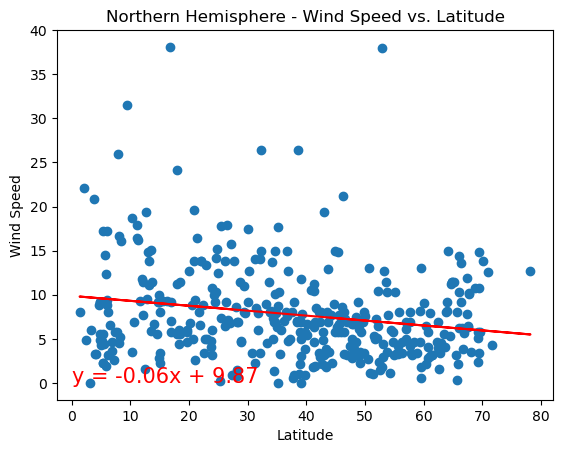

In [89]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Wind Speed',(40,25))

#Set titles
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

The r-value is: -0.07363023804437648
The equation of the regression line is: y = -0.04x + 8.81


Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed vs. Latitude')

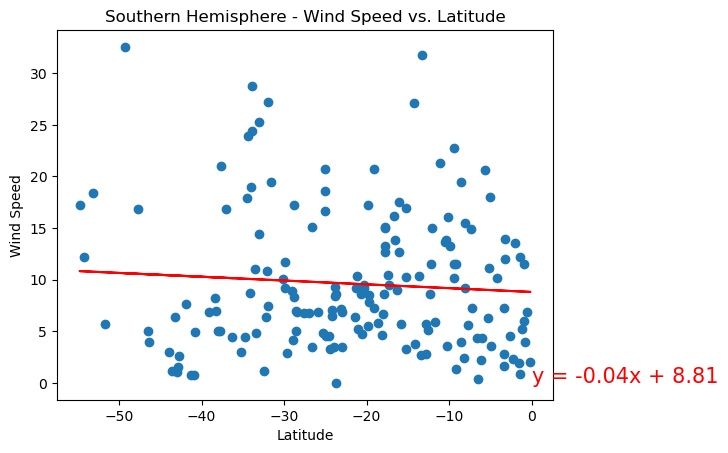

In [90]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Wind Speed',(-55,20))

#Set titles
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')


**Discussion about the linear relationship:** It would appear that as lattitude increases windspeed decreases. This is evident in both plots.